# Imports

In [79]:
import numpy as np
import random
import pylab
from scipy import stats
import pylab as pl
import mpl_toolkits
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score


import pandas as pd
from sklearn.datasets import make_blobs
import plotly.express as px
import seaborn as sns
from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt
# import plotly as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

# Load Data (and understand) 

In [2]:
df = pd.read_csv('/Users/user/Desktop/netology/ml/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
profile = ProfileReport(df)
profile

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,15
Number of observations,48842
Total Missing (%),0.0%
Total size in memory,5.6 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


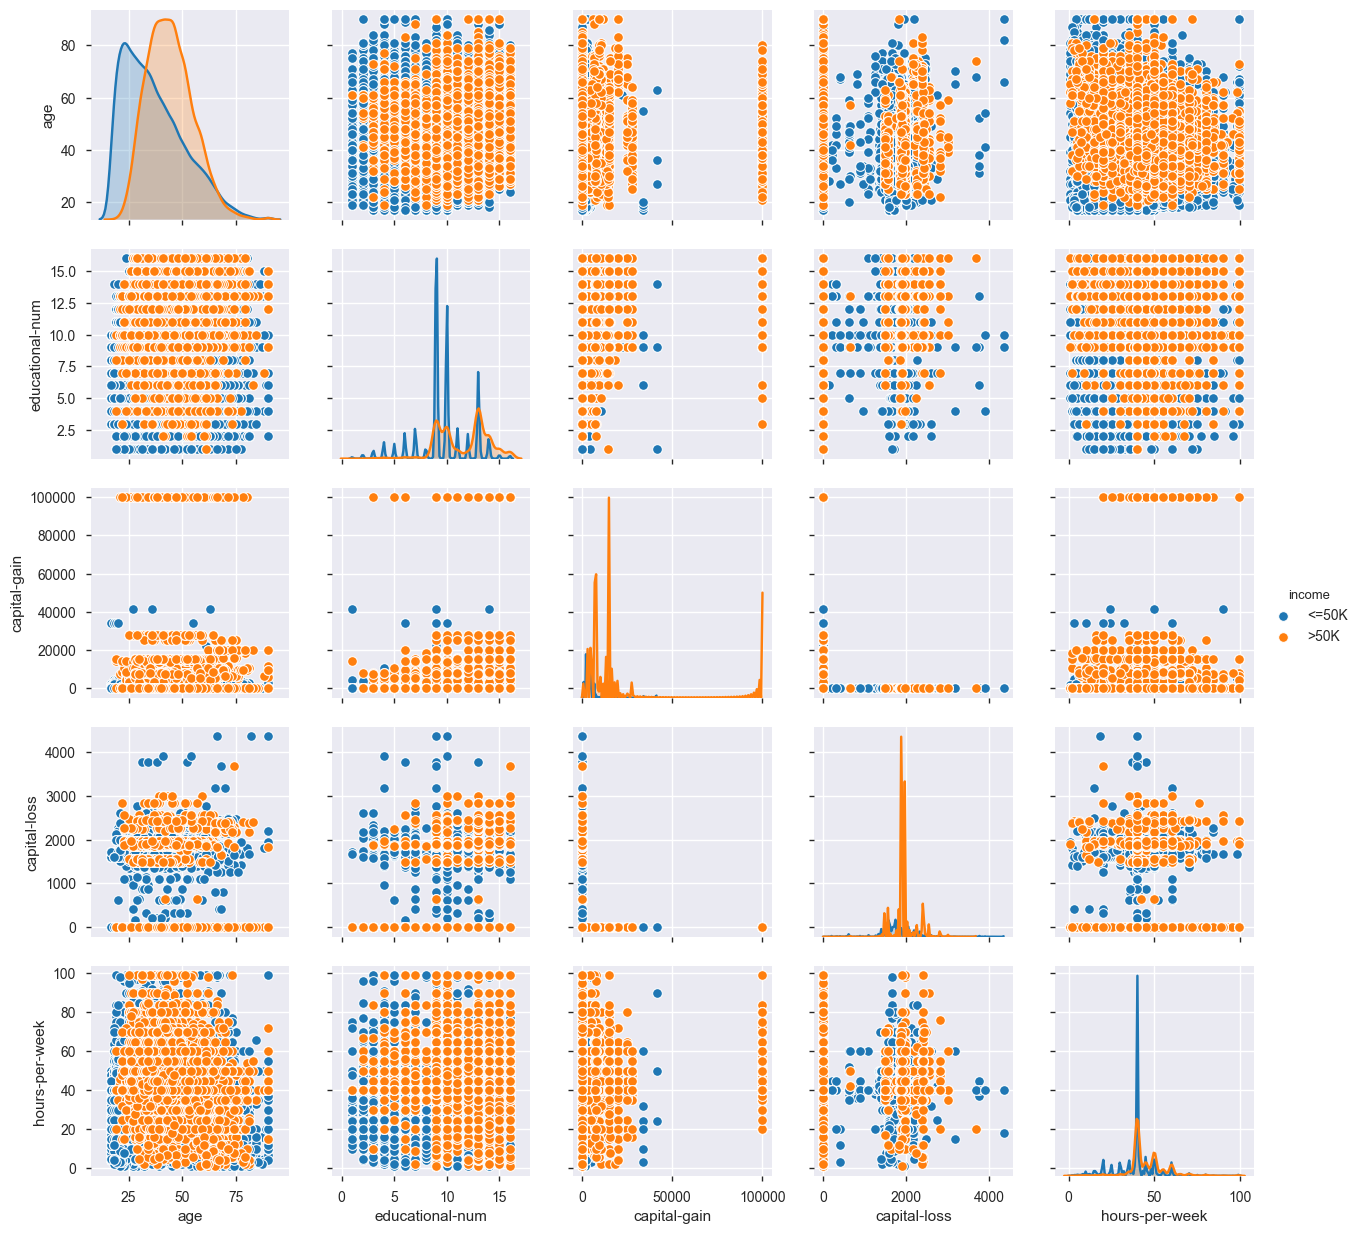

In [10]:
sns.pairplot(df, hue='income')

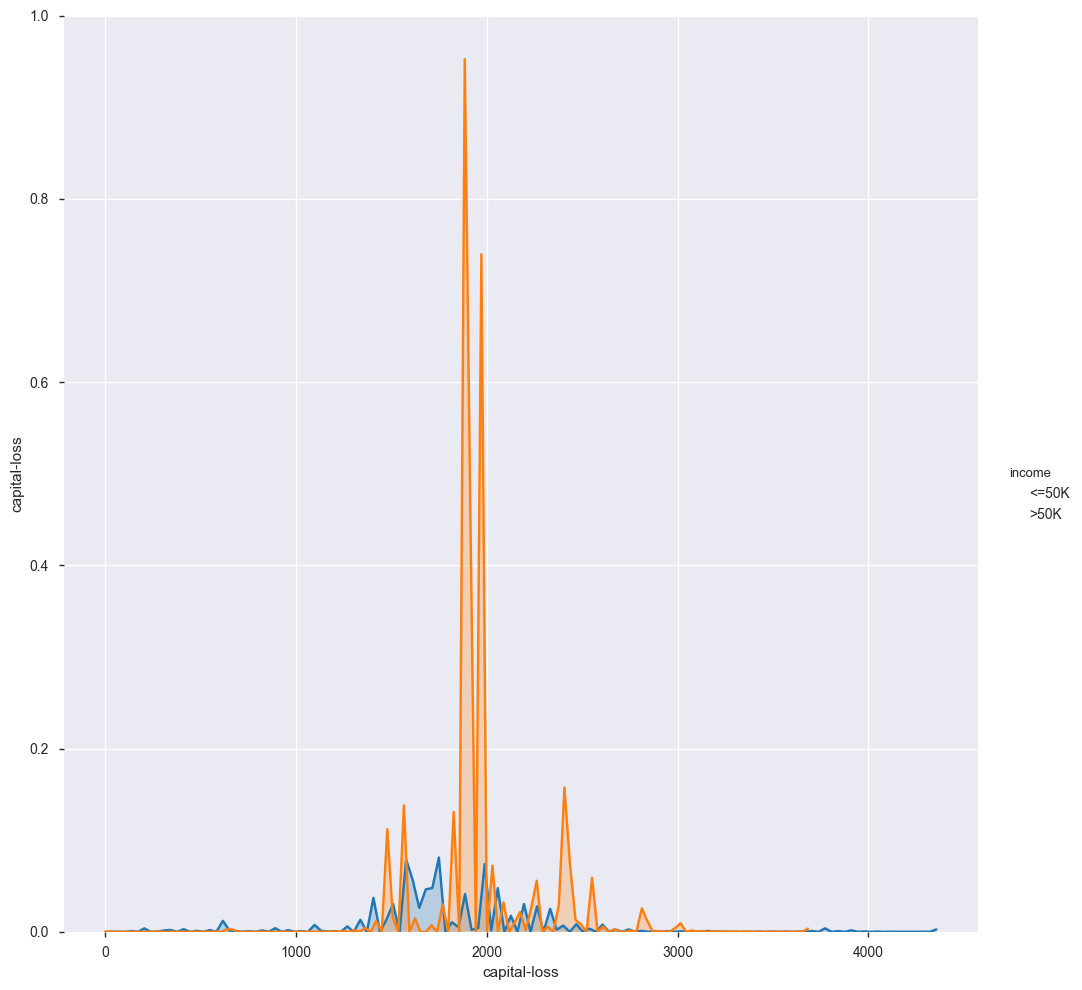

In [14]:
sns.pairplot(df[['capital-loss','income']], hue='income',height = 10)

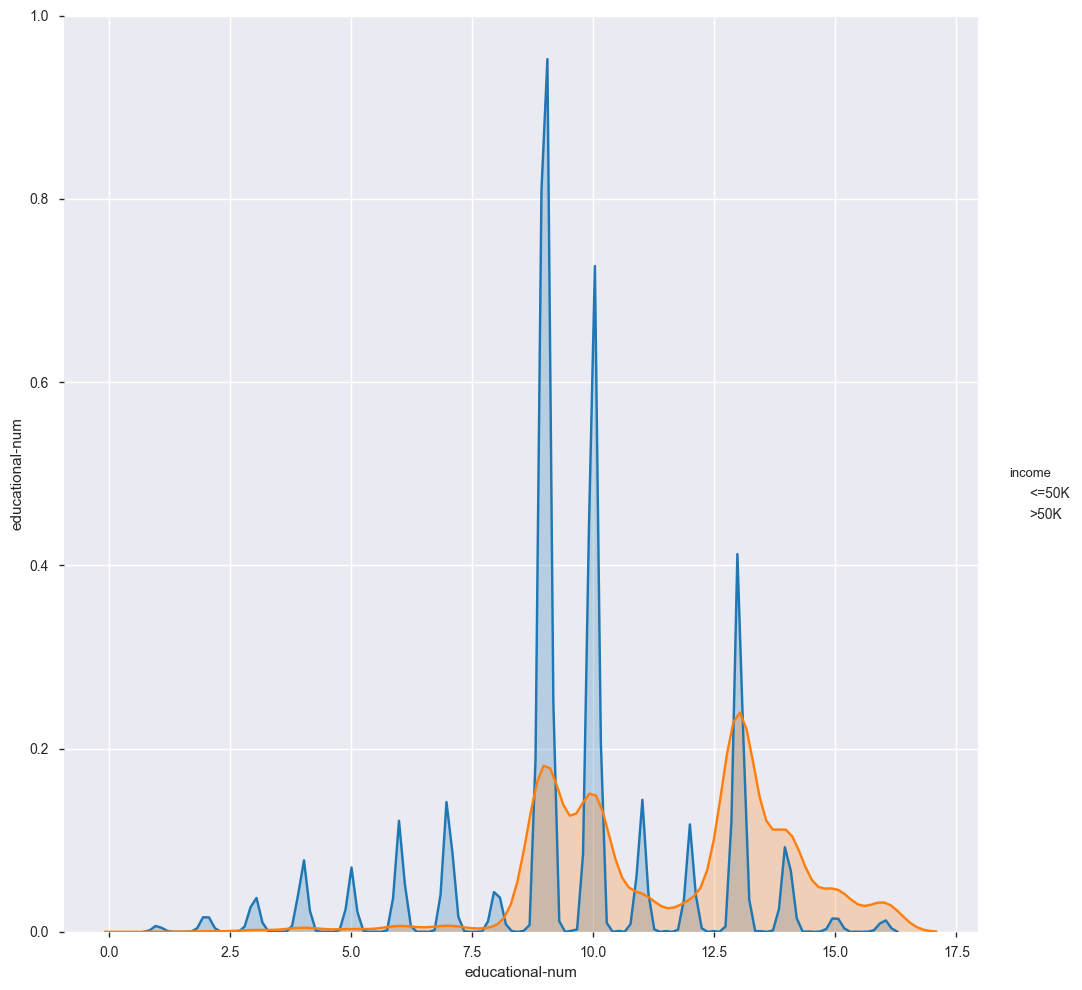

In [16]:
sns.pairplot(df[['educational-num','income']], hue='income',height = 10)

<AxesSubplot:xlabel='count', ylabel='workclass'>

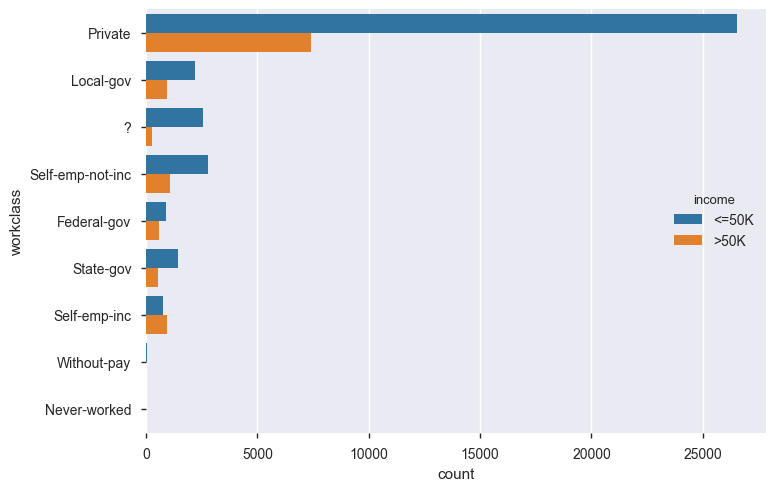

In [40]:
sns.countplot(y='workclass', hue='income', data=df)

<AxesSubplot:xlabel='count', ylabel='workclass'>

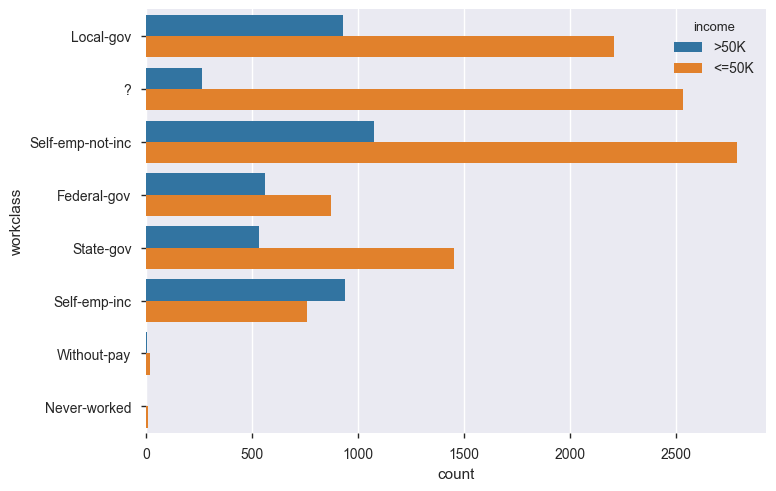

In [60]:
sns.countplot(y='workclass', hue='income', data=df[df['workclass']!='Private'])

<AxesSubplot:xlabel='count', ylabel='education'>

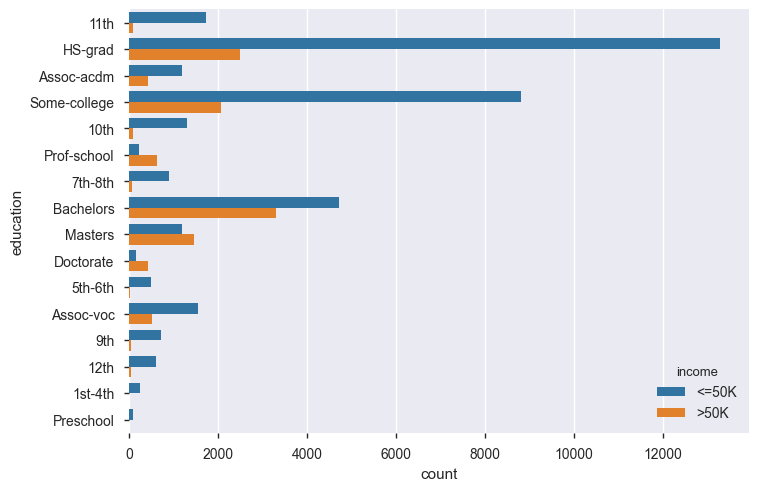

In [39]:
sns.countplot(y='education', hue='income', data=df)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

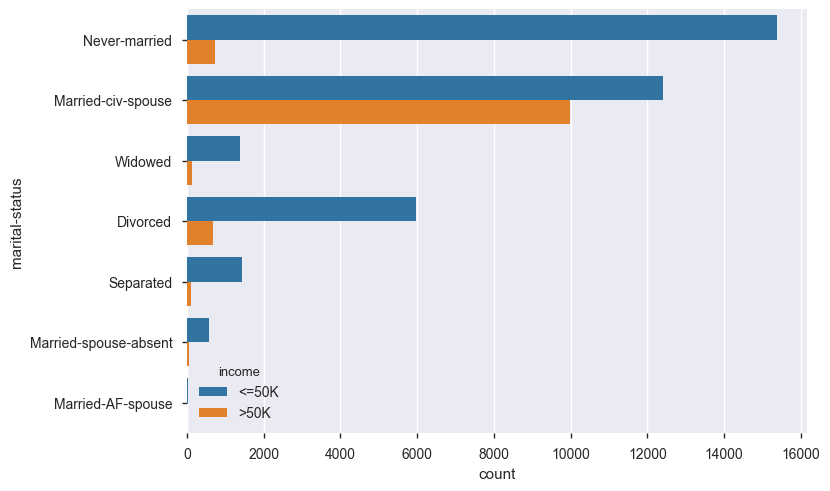

In [41]:
sns.countplot(y='marital-status', hue='income', data=df)

<AxesSubplot:xlabel='count', ylabel='occupation'>

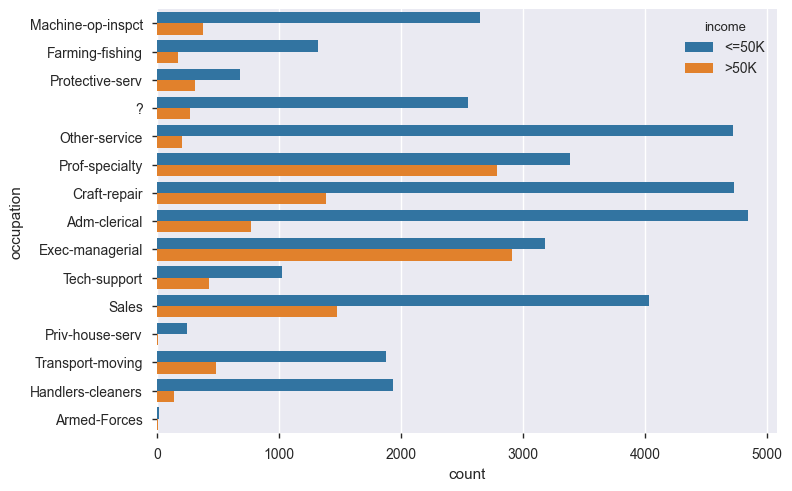

In [42]:
sns.countplot(y='occupation', hue='income', data=df)

<AxesSubplot:xlabel='count', ylabel='relationship'>

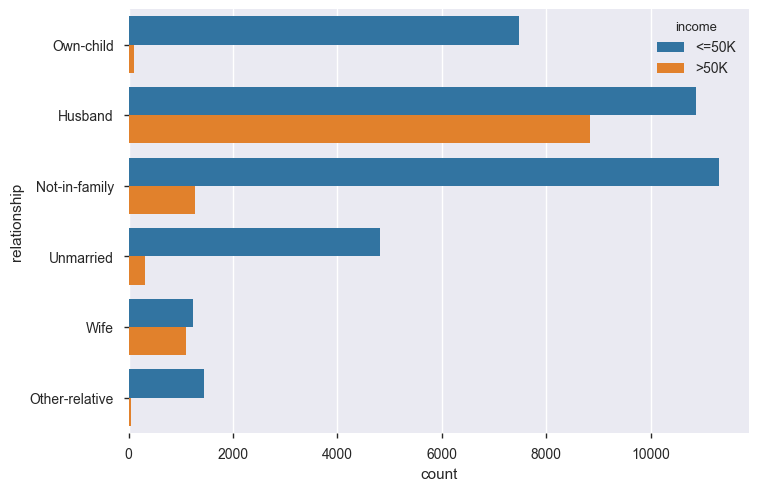

In [43]:
sns.countplot(y='relationship', hue='income', data=df)

<AxesSubplot:xlabel='count', ylabel='race'>

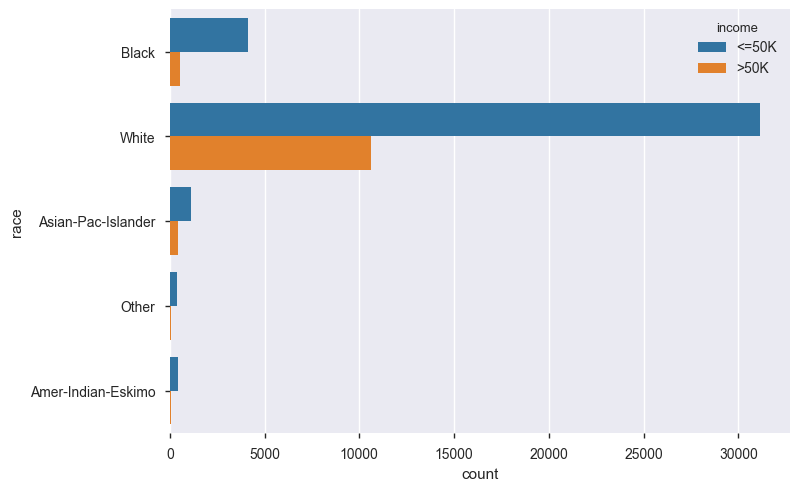

In [54]:
sns.countplot(y='race', hue='income', data=df)

<AxesSubplot:xlabel='count', ylabel='race'>

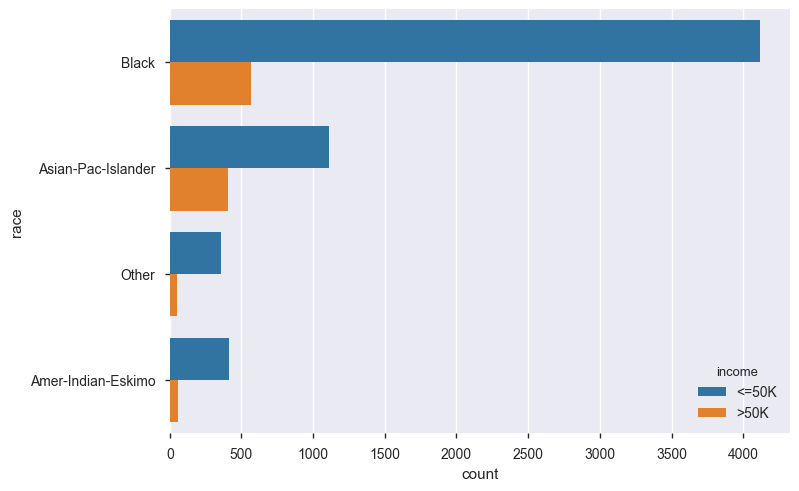

In [53]:
sns.countplot(y='race', hue='income', data=df[df['race'] != 'White'])

# Feature transform.

In [5]:
# fnlwgt
df = df.drop(['fnlwgt'], axis=1)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
# is male
df['is_male'] = (df['gender'] == 'Male').astype(int)
df.drop(columns = ['gender'], inplace= True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,is_male
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,<=50K,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,<=50K,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,>50K,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,>50K,1
4,18,?,Some-college,10,Never-married,?,Own-child,White,0,0,30,United-States,<=50K,0


In [56]:
# is male
df['is_male'] = (df['gender'] == 'Male').astype(int)
df.drop(columns = ['gender'], inplace= True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,is_male,with_relationship
0,25,Private,11th,7,Never-married,Machine-op-inspct,Black,0,0,40,United-States,<=50K,1,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,White,0,0,50,United-States,<=50K,1,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,0,0,40,United-States,>50K,1,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,7688,0,40,United-States,>50K,1,1
4,18,?,Some-college,10,Never-married,?,White,0,0,30,United-States,<=50K,0,0


In [51]:
# relationship
df['with_relationship'] = ((df['relationship'] == 'Husband') | (df['relationship'] == 'Wife')).astype(int)
df.drop(columns = ['relationship'], inplace= True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,is_male,with_relationship
0,25,Private,11th,7,Never-married,Machine-op-inspct,Black,0,0,40,United-States,<=50K,1,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,White,0,0,50,United-States,<=50K,1,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,0,0,40,United-States,>50K,1,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,7688,0,40,United-States,>50K,1,1
4,18,?,Some-college,10,Never-married,?,White,0,0,30,United-States,<=50K,0,0


In [58]:
# marital-status
df.drop(columns = ['marital-status'], inplace= True)
df.head()

,age,workclass,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,is_male,with_relationship,white_or_asian
0,25,Private,11th,7,Machine-op-inspct,0,0,40,United-States,<=50K,1,0,0
1,38,Private,HS-grad,9,Farming-fishing,0,0,50,United-States,<=50K,1,1,1
2,28,Local-gov,Assoc-acdm,12,Protective-serv,0,0,40,United-States,>50K,1,1,1
3,44,Private,Some-college,10,Machine-op-inspct,7688,0,40,United-States,>50K,1,1,0
4,18,?,Some-college,10,?,0,0,30,United-States,<=50K,0,0,1


In [59]:
# education
df.drop(columns = ['education'], inplace= True)
df.head()

,age,workclass,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,is_male,with_relationship,white_or_asian
0,25,Private,7,Machine-op-inspct,0,0,40,United-States,<=50K,1,0,0
1,38,Private,9,Farming-fishing,0,0,50,United-States,<=50K,1,1,1
2,28,Local-gov,12,Protective-serv,0,0,40,United-States,>50K,1,1,1
3,44,Private,10,Machine-op-inspct,7688,0,40,United-States,>50K,1,1,0
4,18,?,10,?,0,0,30,United-States,<=50K,0,0,1


In [72]:
# sns.countplot(y='occupation', hue='income', data=df)

In [67]:
# occupation
df['high_level_occupation'] = ((df['occupation'] == 'Prof-specialty') | 
                               (df['occupation'] == 'Exec-managerial')).astype(int)

df['low_level_occupation'] = ((df['occupation'] == 'Other-service') | 
                              (df['occupation'] == 'Handlers-cleaners') |
                              (df['occupation'] == 'Priv-house-serv') |
                              (df['occupation'] == '?') |
                              (df['occupation'] == 'Machine-op-inspct')).astype(int)

df.drop(columns = ['occupation'], inplace= True)
df.head()

,age,workclass,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,is_male,with_relationship,white_or_asian,high_level_occupation,low_level_occupation
0,25,Private,7,0,0,40,United-States,<=50K,1,0,0,0,1
1,38,Private,9,0,0,50,United-States,<=50K,1,1,1,0,0
2,28,Local-gov,12,0,0,40,United-States,>50K,1,1,1,0,0
3,44,Private,10,7688,0,40,United-States,>50K,1,1,0,0,1
4,18,?,10,0,0,30,United-States,<=50K,0,0,1,0,1


In [68]:
# native-country
df.drop(columns = ['native-country'], inplace= True)
df.head()

,age,workclass,educational-num,capital-gain,capital-loss,hours-per-week,income,is_male,with_relationship,white_or_asian,high_level_occupation,low_level_occupation
0,25,Private,7,0,0,40,<=50K,1,0,0,0,1
1,38,Private,9,0,0,50,<=50K,1,1,1,0,0
2,28,Local-gov,12,0,0,40,>50K,1,1,1,0,0
3,44,Private,10,7688,0,40,>50K,1,1,0,0,1
4,18,?,10,0,0,30,<=50K,0,0,1,0,1


In [69]:
# workclass
df['is_self_empl'] = (df['workclass'] == 'Self-emp-inc').astype(int)
df.drop(columns = ['workclass'], inplace= True)
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,is_male,with_relationship,white_or_asian,high_level_occupation,low_level_occupation,is_self_empl
0,25,7,0,0,40,<=50K,1,0,0,0,1,0
1,38,9,0,0,50,<=50K,1,1,1,0,0,0
2,28,12,0,0,40,>50K,1,1,1,0,0,0
3,44,10,7688,0,40,>50K,1,1,0,0,1,0
4,18,10,0,0,30,<=50K,0,0,1,0,1,0


In [71]:
# income
df['high_income'] = (df['income'] == '>50K').astype(int)
df.drop(columns = ['income'], inplace= True)
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,is_male,with_relationship,white_or_asian,high_level_occupation,low_level_occupation,is_self_empl,high_income
0,25,7,0,0,40,1,0,0,0,1,0,0
1,38,9,0,0,50,1,1,1,0,0,0,0
2,28,12,0,0,40,1,1,1,0,0,0,1
3,44,10,7688,0,40,1,1,0,0,1,0,1
4,18,10,0,0,30,0,0,1,0,1,0,0


# Modeling

In [170]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['high_income']),  
                                                    df[['high_income']], 
                                                    test_size=0.2)

In [171]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
from sklearn.metrics import roc_curve
def print_roc_curve(y_test, pred):
    fpr, tpr, thres = roc_curve(y_test, pred[:,0])
    plt.plot(tpr,fpr)

[[7047  388]
 [ 971 1363]]
0.8608864776333299


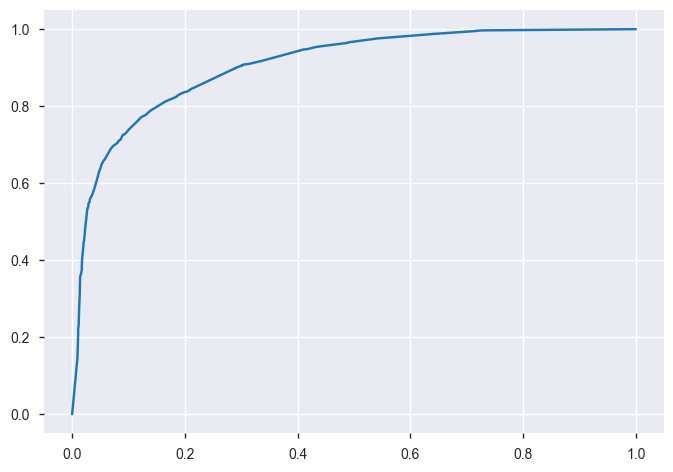

In [173]:
clf = DecisionTreeClassifier(max_depth=10, random_state = 0)
clf.fit(X_train, y_train)

print(confusion_matrix(y_test, clf.predict(X_test)))
print(accuracy_score(y_test, clf.predict(X_test)))
print_roc_curve(y_test, clf.predict_proba(X_test))

In [174]:
clf.feature_importances_

array([5.05694943e-02, 2.06174024e-01, 1.93371696e-01, 6.94154962e-02,
       3.51310298e-02, 5.22655289e-03, 4.05586026e-01, 3.63259804e-04,
       2.41272272e-02, 8.27460108e-03, 1.76059279e-03])

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8711386379341233
0.8621148531067663


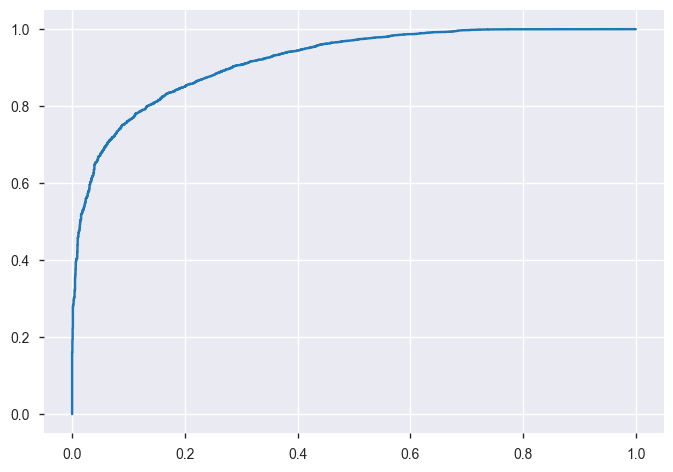

In [175]:
r = StackingClassifier(
    [
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state = 10)),

    ],
LogisticRegression())

m = r.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))
print_roc_curve(y_test, m.predict_proba(X_test))

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[7081  354]
 [ 982 1352]]
0.8632408639574163


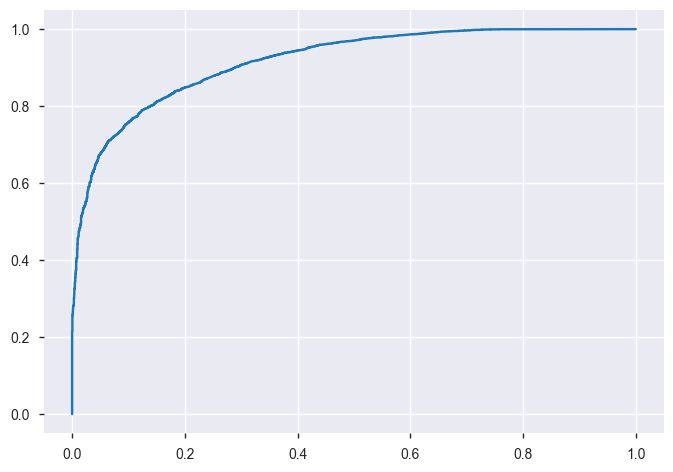

In [176]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state = 0)
rf.fit(X_train, y_train)

print(confusion_matrix(y_test, rf.predict(X_test)))
print(accuracy_score(y_test, rf.predict(X_test)))
print_roc_curve(y_test, rf.predict_proba(X_test))

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[6901  534]
 [ 975 1359]]
0.8455317842153751


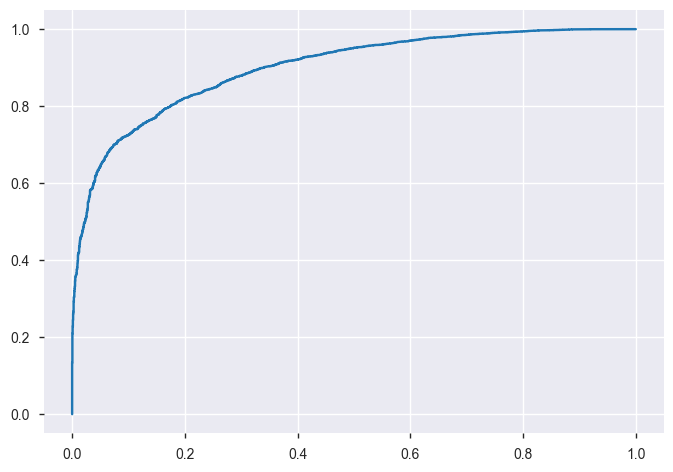

In [177]:
lr= LogisticRegression()
lr.fit(X_train, y_train)

print(confusion_matrix(y_test, lr.predict(X_test)))
print(accuracy_score(y_test, lr.predict(X_test)))
print_roc_curve(y_test, lr.predict_proba(X_test))